In [62]:
import torch
from torchvision import transforms, datasets
import os
import matplotlib.pyplot as plt

In [13]:
os.listdir('apple_leaf_dataset/backbone/valid_backbone')
# target_names = {lbl:num for num, lbl in enumerate(os.listdir('apple_leaf_dataset/backbone/train_backbone'))}

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']

In [21]:
target_names['Apple___Apple_scab']

0

In [ ]:
target_names = {lbl:num for num, lbl in enumerate(os.listdir('apple_leaf_dataset/backbone/train_backbone'))}

In [32]:
target_names

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3}

In [39]:
fn_label = lambda label: torch.tensor(target_names[label])
fn_label('Apple___Apple_scab')

tensor(0)

In [70]:
train_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
    ])

valid_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
    ])


train_dataset = datasets.ImageFolder(root='apple_leaf_dataset/backbone/train_backbone',
                                           transform=train_transform,)
                                        #    target_transform=transforms.Lambda(lambda label: torch.tensor(target_names[label])) )
valid_dataset = datasets.ImageFolder(root='apple_leaf_dataset/backbone/valid_backbone',
                                           transform=valid_transform,)
                                        #    target_transform=transforms.Lambda(lambda label: torch.tensor(target_names[label])) )


In [71]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 6771
    Root location: apple_leaf_dataset/backbone/train_backbone
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [72]:
valid_dataset

Dataset ImageFolder
    Number of datapoints: 1643
    Root location: apple_leaf_dataset/backbone/valid_backbone
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [73]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=16, shuffle=True,
                                             num_workers=4)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=16, shuffle=False,
                                             num_workers=1)

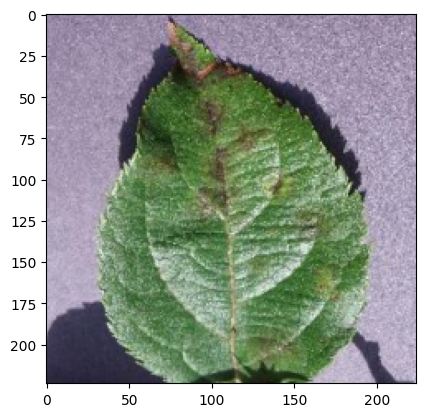

In [75]:
img, lbl = next(iter(train_loader))

image= img[-1] 
image = image.permute(1,2,0)
# image.shape
image = image * 0.5 + 0.5
image = image.cpu().numpy()

plt.imshow(image)

In [69]:
image.shape

(224, 224, 3)